# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [1]:
# Importing lots of libraries and functions

import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# reading in the df
import_df = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data?raw=true"

df = pd.read_csv(import_df,header=None)

In [3]:
df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# naming the columns

df.columns= ['Age', 'Work_class', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status',
            'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
             'Hours_per_week', 'Native_country','fifty_grand']

In [5]:
df 

,Age,Work_class,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,fifty_grand
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# counting nulls
df.isnull().sum()

Age               0
Work_class        0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
fifty_grand       0
dtype: int64

In [7]:
feature_names = df.columns

In [8]:
feature_names

Index(['Age', 'Work_class', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'fifty_grand'],
      dtype='object')

In [9]:
# datatypes
df.dtypes

Age                int64
Work_class        object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
fifty_grand       object
dtype: object

In [10]:
categorical_vars = ['Work_class', 'Education', 'Marital_status', 'Occupation',
                    'Relationship', 'Race', 'Sex', 'Native_country']

In [11]:
# onehot encoding
for column in categorical_vars:
    df = pd.get_dummies(df, columns = [column])

In [12]:
df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,fifty_grand,Work_class_ ?,Work_class_ Federal-gov,Work_class_ Local-gov,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df.dtypes

Age                                            int64
Fnlwgt                                         int64
Education_num                                  int64
Capital_gain                                   int64
Capital_loss                                   int64
Hours_per_week                                 int64
fifty_grand                                   object
Work_class_ ?                                  uint8
Work_class_ Federal-gov                        uint8
Work_class_ Local-gov                          uint8
Work_class_ Never-worked                       uint8
Work_class_ Private                            uint8
Work_class_ Self-emp-inc                       uint8
Work_class_ Self-emp-not-inc                   uint8
Work_class_ State-gov                          uint8
Work_class_ Without-pay                        uint8
Education_ 10th                                uint8
Education_ 11th                                uint8
Education_ 12th                               

In [14]:
df.shape

(32561, 109)

In [15]:
df.describe

<bound method NDFrame.describe of        Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
5       37  284582             14             0             0              40   
6       49  160187              5             0             0              16   
7       52  209642              9             0             0              45   
8       31   45781             14         14084             0              50   
9       42  159449             13          5178             0              40   
10      37  280464             10             0             0              

In [16]:
df['fifty_grand'][5]

' <=50K'

In [17]:
fifty_grand_dict = {' >50K': 1,' <=50K':0 }

In [18]:
df['fifty_grand']= df['fifty_grand'].map(fifty_grand_dict)

In [19]:
df['fifty_grand']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
32531    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32539    1
32540    0
32541    0
32542    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: fifty_grand, Length: 32561, dtype: int64

## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [20]:
y_Var = df['fifty_grand']

In [21]:
y_Var

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
32531    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32539    1
32540    0
32541    0
32542    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: fifty_grand, Length: 32561, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.drop('fifty_grand')],
                                                    y_Var, train_size=0.80)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/anaconda2/envs/py3k/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda2/envs/py3k/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/py3k/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [23]:
# fitting

log_reg = linear_model.LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/anaconda2/envs/py3k/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
# testing
print(accuracy_score(y_test, y_pred))

0.8487640104406572


In [25]:
#sklearn.metrics.mean_absolute_error(y_true, y_pred, sample_weight=None,
        #multioutput=’uniform_average’)

In [26]:
from sklearn.metrics import mean_absolute_error

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
print (mean_absolute_error(y_test,y_pred))

0.15123598955934286


In [49]:
coefficients = pd.Series(log_reg.coef_[0],
                         index=X_train.columns)

coeff_df = pd.DataFrame(data=coefficients)

print(X_train.columns)
#coefs = coefs.sort_values()
#plt.subplot(1,1,1)
#coefs.plot(kind="bar")
#plt.show()
#print( coefs.sort_values(ascending = False))

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Work_class_ ?', 'Work_class_ Federal-gov',
       'Work_class_ Local-gov', 'Work_class_ Never-worked',
       ...
       'Native_country_ Portugal', 'Native_country_ Puerto-Rico',
       'Native_country_ Scotland', 'Native_country_ South',
       'Native_country_ Taiwan', 'Native_country_ Thailand',
       'Native_country_ Trinadad&Tobago', 'Native_country_ United-States',
       'Native_country_ Vietnam', 'Native_country_ Yugoslavia'],
      dtype='object', length=108)


In [63]:
coeff_df.columns=['Coefficient']
coeff_df['Squared_Coefficient'] = coeff_df['Coefficient']**2

In [65]:
# For the 10 highest coefficients
coeff_df = coeff_df.sort_values(by=['Squared_Coefficient'],ascending=False)
coeff_df.head(10)

,Coefficient,Squared_Coefficient
Capital_gain,2.383248,5.679871
Marital_status_ Married-civ-spouse,0.732103,0.535974
Marital_status_ Never-married,-0.524972,0.275595
Education_ Preschool,-0.478994,0.229435
Hours_per_week,0.376806,0.141983
Education_num,0.370585,0.137334
Age,0.355657,0.126492
Relationship_ Own-child,-0.301878,0.091130
Relationship_ Wife,0.289975,0.084085
Occupation_ Priv-house-serv,-0.269107,0.072419


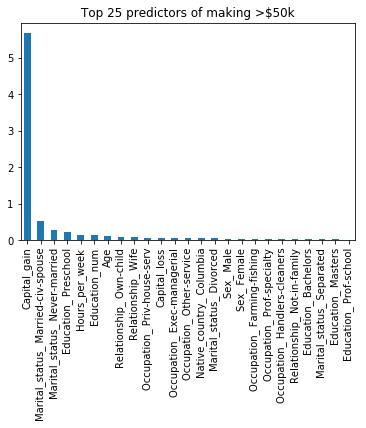

In [66]:
top25 = coeff_df['Squared_Coefficient'].head(25)


top25.plot(kind="bar")
plt.title('Top 25 predictors of making >$50k')
plt.show();

In [71]:
non_predictors = coeff_df.sort_values(by=['Squared_Coefficient'],ascending=True)
bottom25 = non_predictors.head(25)
non_predictors.head(10)

,Coefficient,Squared_Coefficient
Native_country_ Iran,-0.001044,0.000001
Native_country_ Trinadad&Tobago,-0.001257,0.000002
Native_country_ Scotland,-0.001363,0.000002
Education_ Assoc-acdm,-0.001457,0.000002
Native_country_ Hong,0.001478,0.000002
Native_country_ Poland,-0.002057,0.000004
Native_country_ Taiwan,-0.003431,0.000012
Native_country_ Portugal,-0.004335,0.000019
Native_country_ Guatemala,-0.004421,0.000020
Native_country_ Hungary,0.006204,0.000038


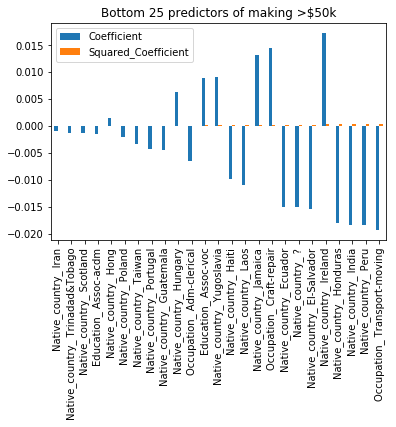

In [72]:
bottom25.plot(kind="bar")
plt.title('Bottom 25 predictors of making >$50k')
plt.show();

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

**TODO - your answers!**

In [76]:
#pd.options.display.max_rows = 999 
#coeff_df['Coefficient']

Capital_gain                                  2.383248
Marital_status_ Married-civ-spouse            0.732103
Marital_status_ Never-married                -0.524972
Education_ Preschool                         -0.478994
Hours_per_week                                0.376806
Education_num                                 0.370585
Age                                           0.355657
Relationship_ Own-child                      -0.301878
Relationship_ Wife                            0.289975
Occupation_ Priv-house-serv                  -0.269107
Capital_loss                                  0.255844
Occupation_ Exec-managerial                   0.255424
Occupation_ Other-service                    -0.255173
Native_country_ Columbia                     -0.250360
Marital_status_ Divorced                     -0.218936
Sex_ Male                                     0.213126
Sex_ Female                                  -0.213126
Occupation_ Farming-fishing                  -0.189315
Occupation

In [73]:
#What are 3 features positively correlated with income above 50k?

print ('These are the top 3 features positively correlated with income above $50k')
top_3 = coeff_df.sort_values(by=['Coefficient'],ascending=False)
top_3.head(3)


These are the top 3 features positively correlated with income above $50k


,Coefficient,Squared_Coefficient
Capital_gain,2.383248,5.679871
Marital_status_ Married-civ-spouse,0.732103,0.535974
Hours_per_week,0.376806,0.141983


In [77]:
#What are 3 features negatively correlated with income above 50k?

print ('These are the top 3 features negatively correlated with income above $50k')
top_3_negative = coeff_df.sort_values(by=['Coefficient'],ascending=True)
top_3_negative.head(3)

These are the top 3 features negatively correlated with income above $50k


,Coefficient,Squared_Coefficient
Marital_status_ Never-married,-0.524972,0.275595
Education_ Preschool,-0.478994,0.229435
Relationship_ Own-child,-0.301878,0.091130


In [78]:
#Overall, how well does the model explain the data and what insights do you derive from it?

print ('Overall, I would say the model is pretty solid. The accuracy score of 84.8% and') 
print ('the mean absolute error of 0.151 are pretty indicative of a decent model.')
print ('I would say there is probably a better way of categorizing or ecoding the origin')
print ('country than by one-hot encoding each one, but it does give you a decent idea')
print ('of how each country of origin serves as a coefficient when held relative to other')
print ('countries.')

Overall, I would say the model is pretty solid. The accuracy score of 84.8% and
the mean absolute error of 0.151 are pretty indicative of a decent model.
I would say there is probably a better way of categorizing or ecoding the origin
country than by one-hot encoding each one, but it does give you a decent idea
of how each country of origin serves as a coefficient when held relative to other
countries.


In [79]:
#Situations:
#You are given data on academic performance of primary school students, and asked to fit a model to help predict
# "at-risk" students who are likely to receive the bottom tier of grades.

print ('Because you are trying to evaluate the predictive power of variables within') 
print ('the context of a specific quantiles of students, you would use quantile regression')
print (', as it is used to show how the data of a predictive factor can sometimes have')
print ('much different distributions when observed within the context of extreme cases.')
print ('Data can often behave so much differently within the context of the extremes, that')
print ('you cannot generalize the mean predictive power of some variables to these cases.')

Because you are trying to evaluate the predictive power of variables within
the context of a specific quantiles of students, you would use quantile regression
, as it is used to show how the data of a predictive factor can sometimes have
much different distributions when observed within the context of extreme cases.
Data can often behave so much differently within the context of the extremes, that
you cannot generalize the mean predictive power of some variables to these cases.


In [80]:
# You are studying tech companies and their patterns in releasing new products,
#and would like to be able to model and 
# predict when a new product is likely to be launched.

print ('Because you are trying to predict a life cycle of an event,') 
print ('you would use a the survival analysis technique as it is applied')
print ('to cases in which there is a distinct "birth event" and a distinct "death event" ')
print ('as well as a variable that is a measure of the time or length of the cycle between')
print ('the birth and death events. In this case, you would observe the introduction of a')
print ('new product as the birth event with the death event being that discontinuance of the')
print ('product. You would be able to observe how the other variables change over time and')
print ('how their changes also change the anticipated time to the end of the current life cycle')

Because you are trying to predict a life cycle of an event,
you would use a the survival analysis technique as it is applied
to cases in which there is a distinct "birth event" and a distinct "death event" 
as well as a variable that is a measure of the time or length of the cycle between
the birth and death events. In this case, you would observe the introduction of a
new product as the birth event with the death event being that discontinuance of the
product. You would be able to observe how the other variables change over time and
how their changes also change the anticipated time to the end of the current life cycle


In [ ]:
#You are working on modeling expected plant size and yield with a laboratory
# that is able to capture fantastically detailed physical data about plants,
#but only of a few dozen plants at a time.



Because the data is described as "fantastically detailed," that implies there are a lot of features- some of which will likely be incredibly predictive while others not so much.
Given the high level of detail and the time cost of detailing each plant, it is best to apply ridge regression to minimize the effects of variables with little predictive power asymptotically toward 0. This model requires you to introduce error toward less predictive variables, but it is intended to do so to the benefit of reduced variance in predicted result versus observed results. A very common use case is in data that contains a great deal of multicollinearity 

Though the penalty function of Ridge regression can only asymptotically approach zero as variables are penalized, lasso regression can actually penalize these all the way to zero as it uses absolute value rather than squaring. 